In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

# to see in class example refer to 21/2/06

# Read the CSV

In [2]:
df = pd.read_csv("gentrified_LA_data01.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.head()

,OBJECTID,Zip Code,Rank,Neighborhood,% Change in IRS Ratio,% Change in Median Household Size,Change in % White Non Hispanic,Change in % >=25 with Bachelor's Degrees,% Change in Rent (Inflation Adjusted),Index Score,...,MF SF Sold Demo 00-14,MF Total Acres Sold Demo 00-14,MF Sold Demo Average Age,Input_#5_Zip,RET Prop Sold Demoed 01-14,RET SF Sold Demoed 01-14,RET Avg Age Sold Demoed 01-14,RET Acres Sold Demoed 01-14,Input_#6_Zip,2014_Median_HomePrice
0,1,90001,37,Florence,-47.007,-2.759,-0.086,1.561,24.858,0.389561,...,65653.0,3.8364,94.181818,90001.0,2.0,3143.0,36.000000,1.0386,90001.0,248958.3333
1,2,90002,57,Watts/Green Meadows,-44.965,1.683,0.346,1.309,25.733,0.359525,...,NaN,NaN,NaN,90002.0,6.0,39111.0,72.666667,1.4631,90002.0,237333.3333
2,3,90003,33,Florence/Broadway-Manchester,-41.524,3.000,-0.182,2.798,35.303,0.402008,...,31200.0,0.3880,63.000000,90003.0,5.0,45526.0,72.600000,2.3245,90003.0,271954.5833
3,4,90004,15,East Hollywood/Larchmont/Windsor Square,-32.379,-6.873,3.060,11.296,29.716,0.483000,...,440269.0,6.8533,66.307692,90004.0,3.0,20474.0,90.666667,1.0935,90004.0,853666.2500
4,5,90005,20,Koreatown/Mid-Wilshire,-41.123,-8.214,0.934,7.120,24.864,0.460000,...,223137.0,7.0523,82.968750,90005.0,4.0,114268.0,66.250000,2.6023,90005.0,550625.0000


# Select control model features, place into dataframe

In [3]:
# Set up x values/features df with just control model columns, this is cut #1

# show all columns
pd.set_option('display.max_columns', None)

# reduce set to cols 0-29
selected_features = df.iloc[:, 0:29]
selected_features.head()

,OBJECTID,Zip Code,Rank,Neighborhood,% Change in IRS Ratio,% Change in Median Household Size,Change in % White Non Hispanic,Change in % >=25 with Bachelor's Degrees,% Change in Rent (Inflation Adjusted),Index Score,Index Percentile,Index Quartile,High to Low AGI Ratio (2000),High to Low AGI Ratio (2014),Median Household Income (2014),Median Household Size (2000),Median Household Size (2013),% White Non-Hispanic (2000),% White Non-Hispanic (2014),% >=25 w Bachelor's Degree (2000),% >=25 w Bachelor's Degree (2014),Median Gross Rent (2000 - Inflation Adjusted),Median Gross Rent 2014,% Change in Median Gross Rent,Median Household Income (2000 - Inflation Adjusted),% Change in Median Houshold Income (Inflation Adjusted),Population (2000),Population (2014),Population Change (2000-2014)
0,1,90001,37,Florence,-47.007,-2.759,-0.086,1.561,24.858,0.389561,0.669,3,24.339,12.898,34050,4.35,4.23,0.78,0.69,2.41,3.97,781,975,0.248399,33279.05739,2.316600,54481,56314,3.4
1,2,90002,57,Watts/Green Meadows,-44.965,1.683,0.346,1.309,25.733,0.359525,0.486,2,27.413,15.087,30214,4.16,4.23,0.47,0.81,3.00,4.31,770,968,0.257143,31443.73944,-3.910920,44584,50098,12.4
2,3,90003,33,Florence/Broadway-Manchester,-41.524,3.000,-0.182,2.798,35.303,0.402008,0.706,3,31.808,18.600,30016,4.00,4.12,0.68,0.49,3.30,6.09,786,1064,0.353690,30720.61042,-2.293608,58187,66913,15.0
3,4,90004,15,East Hollywood/Larchmont/Windsor Square,-32.379,-6.873,3.060,11.296,29.716,0.483000,0.871,4,2.338,1.581,38493,2.91,2.71,14.30,17.36,22.30,33.59,825,1070,0.296970,37931.27907,1.480891,67850,63547,-6.3
4,5,90005,20,Koreatown/Mid-Wilshire,-41.123,-8.214,0.934,7.120,24.864,0.460000,0.825,4,4.074,2.399,31214,2.80,2.57,7.56,8.49,19.03,26.15,752,939,0.248670,30242.19046,3.213423,43014,38638,-10.2


In [4]:
# get the shape of the file
selected_features.shape

(110, 29)

In [5]:
# remove non-feature columns
selected_features = selected_features.drop(['OBJECTID', 'Zip Code', 'Rank', 'Neighborhood', 'Index Score', 'Index Percentile'], axis=1)
selected_features.head()

,% Change in IRS Ratio,% Change in Median Household Size,Change in % White Non Hispanic,Change in % >=25 with Bachelor's Degrees,% Change in Rent (Inflation Adjusted),Index Quartile,High to Low AGI Ratio (2000),High to Low AGI Ratio (2014),Median Household Income (2014),Median Household Size (2000),Median Household Size (2013),% White Non-Hispanic (2000),% White Non-Hispanic (2014),% >=25 w Bachelor's Degree (2000),% >=25 w Bachelor's Degree (2014),Median Gross Rent (2000 - Inflation Adjusted),Median Gross Rent 2014,% Change in Median Gross Rent,Median Household Income (2000 - Inflation Adjusted),% Change in Median Houshold Income (Inflation Adjusted),Population (2000),Population (2014),Population Change (2000-2014)
0,-47.007,-2.759,-0.086,1.561,24.858,3,24.339,12.898,34050,4.35,4.23,0.78,0.69,2.41,3.97,781,975,0.248399,33279.05739,2.316600,54481,56314,3.4
1,-44.965,1.683,0.346,1.309,25.733,2,27.413,15.087,30214,4.16,4.23,0.47,0.81,3.00,4.31,770,968,0.257143,31443.73944,-3.910920,44584,50098,12.4
2,-41.524,3.000,-0.182,2.798,35.303,3,31.808,18.600,30016,4.00,4.12,0.68,0.49,3.30,6.09,786,1064,0.353690,30720.61042,-2.293608,58187,66913,15.0
3,-32.379,-6.873,3.060,11.296,29.716,4,2.338,1.581,38493,2.91,2.71,14.30,17.36,22.30,33.59,825,1070,0.296970,37931.27907,1.480891,67850,63547,-6.3
4,-41.123,-8.214,0.934,7.120,24.864,4,4.074,2.399,31214,2.80,2.57,7.56,8.49,19.03,26.15,752,939,0.248670,30242.19046,3.213423,43014,38638,-10.2


In [6]:
# get the shape of the file
selected_features.shape

(110, 23)

In [7]:
# get descriptive stats for each column
selected_features.describe()

,% Change in IRS Ratio,% Change in Median Household Size,Change in % White Non Hispanic,Change in % >=25 with Bachelor's Degrees,% Change in Rent (Inflation Adjusted),Index Quartile,High to Low AGI Ratio (2000),High to Low AGI Ratio (2014),Median Household Income (2014),Median Household Size (2000),Median Household Size (2013),% White Non-Hispanic (2000),% White Non-Hispanic (2014),% >=25 w Bachelor's Degree (2000),% >=25 w Bachelor's Degree (2014),Median Gross Rent (2000 - Inflation Adjusted),Median Gross Rent 2014,% Change in Median Gross Rent,Median Household Income (2000 - Inflation Adjusted),% Change in Median Houshold Income (Inflation Adjusted),Population (2000),Population (2014),Population Change (2000-2014)
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.00000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,-21.264636,0.020573,-1.951336,6.903400,27.477300,2.50000,3.921400,2.196400,58319.063636,2.746091,2.757182,36.371182,34.824000,27.771000,35.405727,1026.727273,1298.381818,0.274749,59449.966477,-1.142083,37163.463636,38666.836364,5.685455
std,22.867960,5.674417,6.281333,4.853364,16.148539,1.13129,7.059353,3.563287,28782.357449,0.782085,0.729768,29.396129,26.902813,18.883635,20.528214,364.283283,346.630014,0.161378,32564.243298,12.615058,19839.195846,20261.174575,13.985122
min,-72.601000,-18.627000,-24.633000,-0.313000,-13.971000,1.00000,0.041000,0.044000,12748.000000,0.000000,1.270000,0.000000,0.460000,0.000000,3.240000,0.000000,408.000000,-0.139785,0.000000,-28.960210,0.000000,2364.000000,-20.400000
25%,-41.002500,-3.422750,-5.554250,3.520000,21.481250,1.25000,0.305000,0.281500,37353.250000,2.250000,2.267500,8.885000,11.387500,12.822500,20.225000,813.750000,1064.000000,0.214382,37219.835595,-8.605305,23626.750000,25557.250000,-0.075000
50%,-20.856500,1.056500,-1.493500,5.998000,26.322500,2.50000,0.985000,0.847000,52115.000000,2.775000,2.690000,29.900000,29.720000,22.300000,31.055000,935.500000,1189.000000,0.263031,53269.587960,-2.260309,34418.500000,37097.000000,3.900000
75%,-3.971750,4.541750,1.266750,10.106250,31.071750,3.75000,3.550250,2.059750,73258.000000,3.085000,3.115000,64.552500,59.632500,41.885000,52.440000,1191.000000,1536.250000,0.311080,70470.710200,4.407814,48471.500000,49786.500000,8.875000
max,47.208000,9.137000,26.815000,29.511000,108.064000,4.00000,37.713000,18.600000,172443.000000,4.650000,4.590000,88.540000,85.120000,70.810000,80.470000,2325.000000,2000.000000,1.077703,194567.073800,73.490341,101214.000000,102926.000000,95.200000


### Assign x and y variables

In [8]:
# one-hot encode just the index quartile column
selected_features = pd.get_dummies(selected_features, prefix=['Index Quartile'], columns=['Index Quartile'])
selected_features.head()

,% Change in IRS Ratio,% Change in Median Household Size,Change in % White Non Hispanic,Change in % >=25 with Bachelor's Degrees,% Change in Rent (Inflation Adjusted),High to Low AGI Ratio (2000),High to Low AGI Ratio (2014),Median Household Income (2014),Median Household Size (2000),Median Household Size (2013),% White Non-Hispanic (2000),% White Non-Hispanic (2014),% >=25 w Bachelor's Degree (2000),% >=25 w Bachelor's Degree (2014),Median Gross Rent (2000 - Inflation Adjusted),Median Gross Rent 2014,% Change in Median Gross Rent,Median Household Income (2000 - Inflation Adjusted),% Change in Median Houshold Income (Inflation Adjusted),Population (2000),Population (2014),Population Change (2000-2014),Index Quartile_1,Index Quartile_2,Index Quartile_3,Index Quartile_4
0,-47.007,-2.759,-0.086,1.561,24.858,24.339,12.898,34050,4.35,4.23,0.78,0.69,2.41,3.97,781,975,0.248399,33279.05739,2.316600,54481,56314,3.4,0,0,1,0
1,-44.965,1.683,0.346,1.309,25.733,27.413,15.087,30214,4.16,4.23,0.47,0.81,3.00,4.31,770,968,0.257143,31443.73944,-3.910920,44584,50098,12.4,0,1,0,0
2,-41.524,3.000,-0.182,2.798,35.303,31.808,18.600,30016,4.00,4.12,0.68,0.49,3.30,6.09,786,1064,0.353690,30720.61042,-2.293608,58187,66913,15.0,0,0,1,0
3,-32.379,-6.873,3.060,11.296,29.716,2.338,1.581,38493,2.91,2.71,14.30,17.36,22.30,33.59,825,1070,0.296970,37931.27907,1.480891,67850,63547,-6.3,0,0,0,1
4,-41.123,-8.214,0.934,7.120,24.864,4.074,2.399,31214,2.80,2.57,7.56,8.49,19.03,26.15,752,939,0.248670,30242.19046,3.213423,43014,38638,-10.2,0,0,0,1


In [9]:
# get the shape of the file
selected_features.shape

(110, 26)

In [10]:
# Run the model using Index_Quartile_1 for the dependent variable (this will be removed later) and remove
# cols Index2, 3 and 4
selected_features = selected_features.iloc[:, 0:23]
selected_features.head()

,% Change in IRS Ratio,% Change in Median Household Size,Change in % White Non Hispanic,Change in % >=25 with Bachelor's Degrees,% Change in Rent (Inflation Adjusted),High to Low AGI Ratio (2000),High to Low AGI Ratio (2014),Median Household Income (2014),Median Household Size (2000),Median Household Size (2013),% White Non-Hispanic (2000),% White Non-Hispanic (2014),% >=25 w Bachelor's Degree (2000),% >=25 w Bachelor's Degree (2014),Median Gross Rent (2000 - Inflation Adjusted),Median Gross Rent 2014,% Change in Median Gross Rent,Median Household Income (2000 - Inflation Adjusted),% Change in Median Houshold Income (Inflation Adjusted),Population (2000),Population (2014),Population Change (2000-2014),Index Quartile_1
0,-47.007,-2.759,-0.086,1.561,24.858,24.339,12.898,34050,4.35,4.23,0.78,0.69,2.41,3.97,781,975,0.248399,33279.05739,2.316600,54481,56314,3.4,0
1,-44.965,1.683,0.346,1.309,25.733,27.413,15.087,30214,4.16,4.23,0.47,0.81,3.00,4.31,770,968,0.257143,31443.73944,-3.910920,44584,50098,12.4,0
2,-41.524,3.000,-0.182,2.798,35.303,31.808,18.600,30016,4.00,4.12,0.68,0.49,3.30,6.09,786,1064,0.353690,30720.61042,-2.293608,58187,66913,15.0,0
3,-32.379,-6.873,3.060,11.296,29.716,2.338,1.581,38493,2.91,2.71,14.30,17.36,22.30,33.59,825,1070,0.296970,37931.27907,1.480891,67850,63547,-6.3,0
4,-41.123,-8.214,0.934,7.120,24.864,4.074,2.399,31214,2.80,2.57,7.56,8.49,19.03,26.15,752,939,0.248670,30242.19046,3.213423,43014,38638,-10.2,0


In [11]:
# get the shape of the file
selected_features.shape

(110, 23)

In [12]:
# put the target (what you want to classify) into a variable
target = selected_features["Index Quartile_1"]
target_names = ["lower gentrification", "high gentrification"]

In [13]:
# remove the target from the X variables
data = selected_features.drop("Index Quartile_1", axis=1)

# assign the column names to features so we assess importance later on
feature_names = data.columns

# view table
data.head()

,% Change in IRS Ratio,% Change in Median Household Size,Change in % White Non Hispanic,Change in % >=25 with Bachelor's Degrees,% Change in Rent (Inflation Adjusted),High to Low AGI Ratio (2000),High to Low AGI Ratio (2014),Median Household Income (2014),Median Household Size (2000),Median Household Size (2013),% White Non-Hispanic (2000),% White Non-Hispanic (2014),% >=25 w Bachelor's Degree (2000),% >=25 w Bachelor's Degree (2014),Median Gross Rent (2000 - Inflation Adjusted),Median Gross Rent 2014,% Change in Median Gross Rent,Median Household Income (2000 - Inflation Adjusted),% Change in Median Houshold Income (Inflation Adjusted),Population (2000),Population (2014),Population Change (2000-2014)
0,-47.007,-2.759,-0.086,1.561,24.858,24.339,12.898,34050,4.35,4.23,0.78,0.69,2.41,3.97,781,975,0.248399,33279.05739,2.316600,54481,56314,3.4
1,-44.965,1.683,0.346,1.309,25.733,27.413,15.087,30214,4.16,4.23,0.47,0.81,3.00,4.31,770,968,0.257143,31443.73944,-3.910920,44584,50098,12.4
2,-41.524,3.000,-0.182,2.798,35.303,31.808,18.600,30016,4.00,4.12,0.68,0.49,3.30,6.09,786,1064,0.353690,30720.61042,-2.293608,58187,66913,15.0
3,-32.379,-6.873,3.060,11.296,29.716,2.338,1.581,38493,2.91,2.71,14.30,17.36,22.30,33.59,825,1070,0.296970,37931.27907,1.480891,67850,63547,-6.3
4,-41.123,-8.214,0.934,7.120,24.864,4.074,2.399,31214,2.80,2.57,7.56,8.49,19.03,26.15,752,939,0.248670,30242.19046,3.213423,43014,38638,-10.2


In [14]:
# get the shape of the file
data.shape

(110, 22)

### Split the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [16]:
# confirm size of training set (default is 75% of the dataframe, so .75 * 6991 = 5243)
len(X_train)

82

In [17]:
# confirm size of test set (the other 25%)
len(X_test)

28

### Run the K nearest neighbors algorithm

k: 1, Train/Test Score: 1.000/0.893
k: 3, Train/Test Score: 0.878/0.786
k: 5, Train/Test Score: 0.854/0.750
k: 7, Train/Test Score: 0.829/0.786
k: 9, Train/Test Score: 0.817/0.857
k: 11, Train/Test Score: 0.793/0.786
k: 13, Train/Test Score: 0.793/0.786
k: 15, Train/Test Score: 0.793/0.750
k: 17, Train/Test Score: 0.793/0.750
k: 19, Train/Test Score: 0.793/0.750
k: 21, Train/Test Score: 0.793/0.750
k: 23, Train/Test Score: 0.805/0.750
k: 25, Train/Test Score: 0.793/0.750


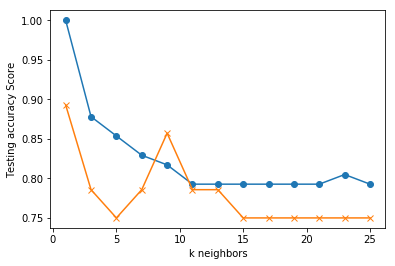

In [19]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 27, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 27, 2), train_scores, marker='o')
plt.plot(range(1, 27, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Accu: %.3f' % knn.score(X_test, y_test))

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'your_name.sav'
# joblib.dump(your_model, filename)